In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("HR_Analytics.csv")
data[:5]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Scatter chart and Line chart

Biểu đồ scatter thường được dùng để đánh giá sự tương quan giữa 2 biến trong tập dữ liệu. Bây giờ ta thử sử dụng biểu đồ này để tìm xem mối liên hệ giữa 2 biến "MonthlyIncome" và "TotalWorkingYears"

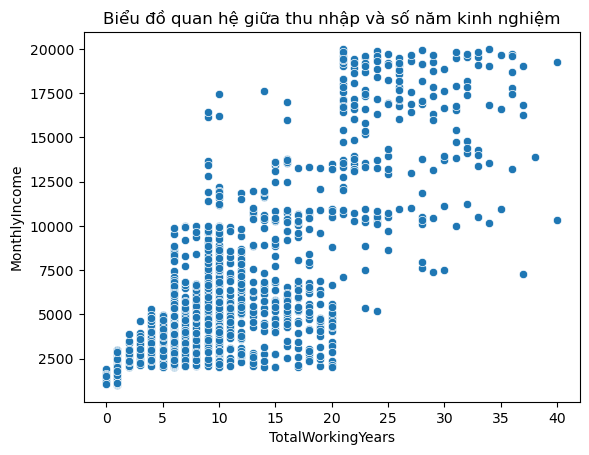

In [61]:
sns.scatterplot(data = data, x = "TotalWorkingYears", y = "MonthlyIncome")
plt.title("Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm")
plt.show()

Nhận xét thông qua biểu đồ:
- Nhìn chung thu nhập có xu hướng tăng theo số năm kinh nghiệm. Các chấm tròn ở phía sau thường ở vị trí cao hơn. 
- Tiền lương có sự chênh lệch giữa mức trước 20 năm và sau 20 năm. Điều này có thể là do sau khi làm việc lâu thì người ta sẽ lên chức cao và công việc khó hơn dẫn đến mức lương có sự khác biệt rất lớn.
- Đa số các chấm tròn tập trung ở vùng từ 0-20, có thể nói là đa số nhân viên đều dưới 20 năm kinh nghiệm, càng lên cao càng ít người.
- Ở mức số năm kinh nghiệm cao (từ 20 năm trở lên) có mức lương rất chênh lệch với nhau, điều này có thể là do đặc thù của ngành.

Việc vẽ biểu đồ scatter có thể biểu diễn tốt mối tương quan giữa 2 biến, tuy nhiên đối với biểu đồ trên thì cùng 1 giá trị x, có rất nhiều giá trị y. Trong trường hợp người ta muốn biết câu trả lời cho "Với số năm kinh nghiệm này thì mức lương thông thường khoảng bao nhiêu?" thì sẽ rất khó để nhìn thấy. Mặc dù ai cũng biết rằng mức lương không chỉ phụ thuộc vào số năm kinh nghiệm nên đưa ra một con số là không chính xác, tuy nhiên mọi người vẫn muốn một con số tương đối, thông thường là sẽ lấy giá trị trung bình. Để trực quan cho câu hỏi trên, ta sẽ dùng biểu đồ đường.

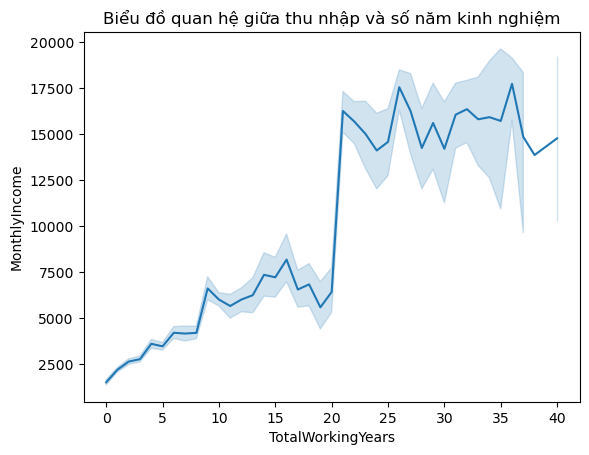

In [62]:
sns.lineplot(data = data, x = "TotalWorkingYears", y = "MonthlyIncome", estimator=np.mean)
plt.title("Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm")
plt.show()

Biểu đồ đường trên lấy giá trị trung bình của y với mỗi giá trị x bằng nhau. Phần nhạt to ra là độ lỗi, được tính bằng độ lệch chuẩn. Phần nhạt màu phình ra càng to chứng tỏ các mức lương tại các thời điểm đó có sự chênh lệch rất lớn giữa những người khác nhau hay có thể nói là mức lương còn phụ thuộc rất nhiều vào những yếu tố khác nữa chứ không chỉ là năm kinh nghiệm. Trường hợp khác có thể là cũng giá trị x đó có quá ít giá trị y nên độ lệch sẽ lớn.

Thông qua biểu đồ trên ta có nhận xét:
- Mức lương trước 20 năm kinh nghiệm có xu hướng tăng dần. Độ chênh lệch giữa các nhân viên khác nhau cũng không cao.
- Sau 20 năm thì thu nhập sẽ đột biến, mức lương sau 20 năm kinh nghiệm cũng chênh lệch rất lớn giữa những người khác nhau.

Tuy vậy, mỗi vai trò khác nhau cũng sẽ có thu nhập. Vì thế, dưới đây ta sẽ vẽ mỗi biểu đồ cho mỗi vai trò để nhìn nhận rõ hơn về mối quan hệ giữa thu nhập và số năm kinh nghiệm.

In [60]:
roles = data.groupby('JobRole').size()
roles

JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64

In [53]:
def data_df_job(data, job):
    return data[data['JobRole'] == job]

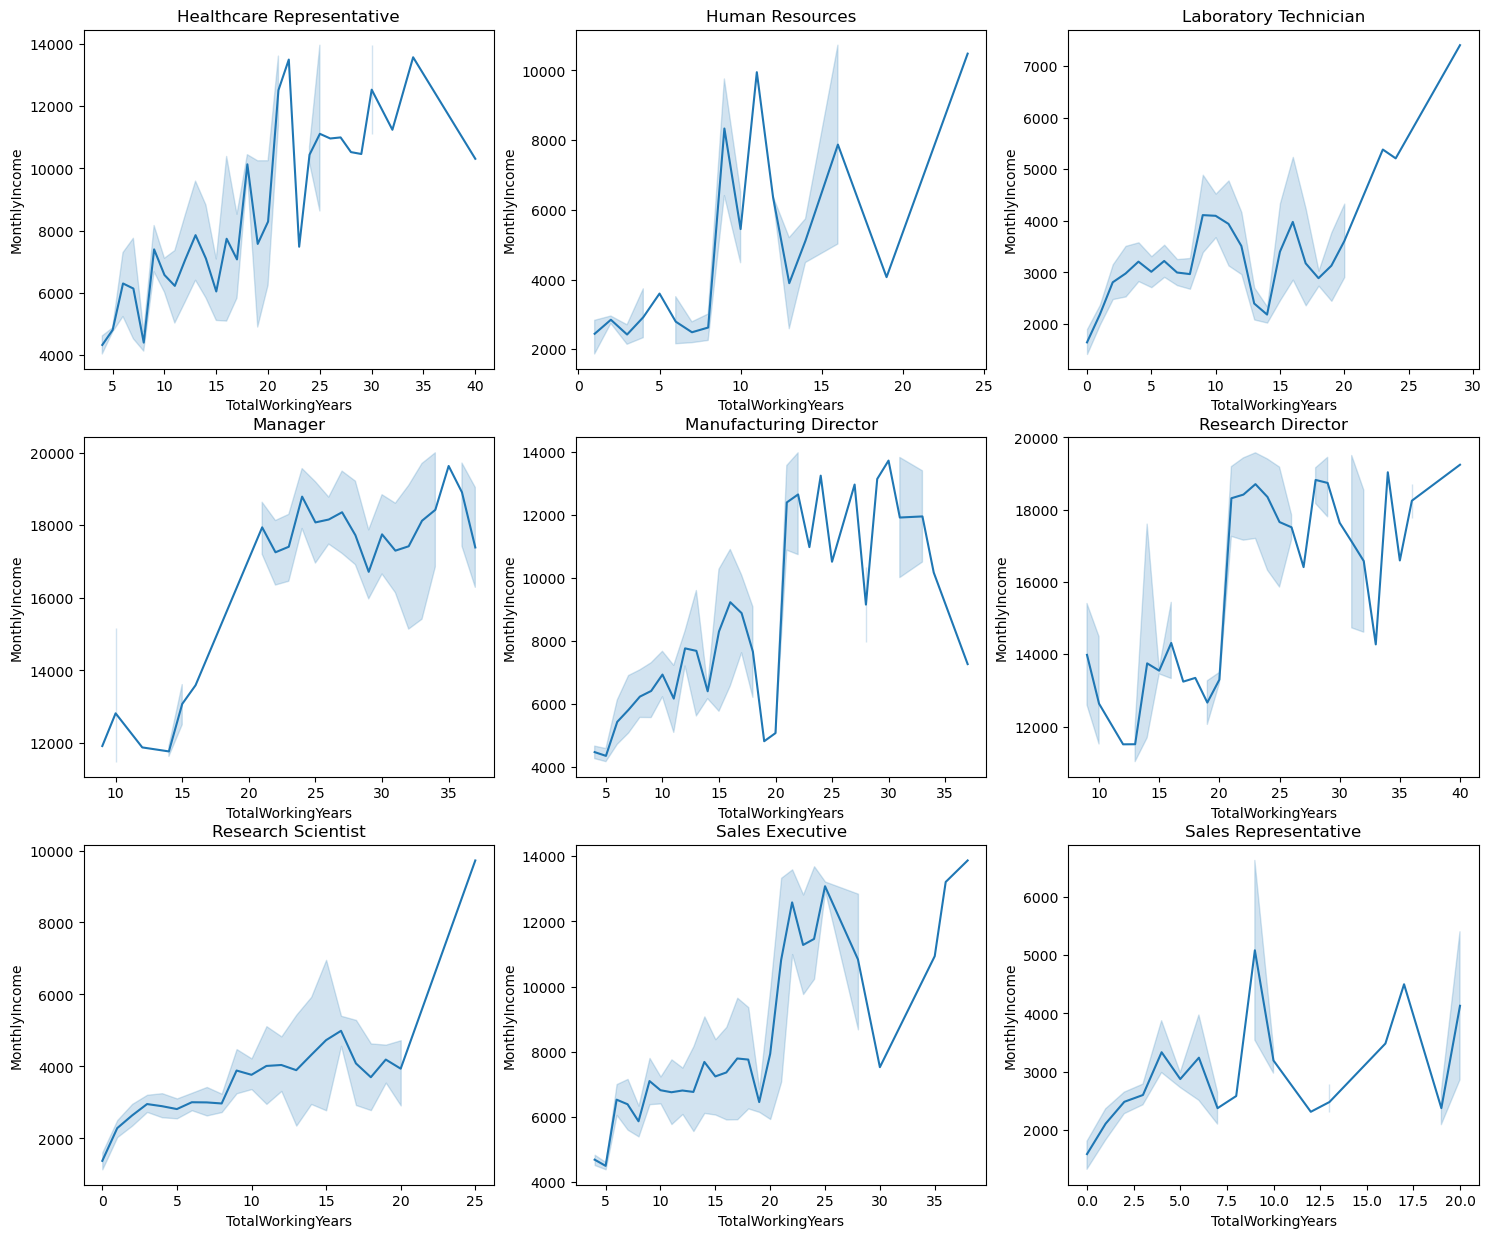

In [64]:
fig, axs = plt.subplots(3, 3, figsize=(18, 5*3))
axs = axs.flatten()
for i, role in enumerate(roles.index):
    role_df = data_df_job(data_df, role)
    sns.lineplot(data = role_df, x = "TotalWorkingYears", y = "MonthlyIncome", estimator=np.mean, 
                 ax = axs[i])
    axs[i].set_title(role)
plt.show()


Nhận xét:
- Theo các biểu đồ trên, mỗi ngành đều có mức lương khác nhau. Trong đó "Manager" và "Research Director" là cao nhất, mức lương tối thiểu của 2 mảng này đủ cao hơn mức lương tối đa của một số mảng khác.
- Đối với các cấp bậc của quản lý như, "Manager", "Manufacturing Director", "Research Director" thì mức lương rất cao, số năm kinh nghiệm tối thiểu cũng rất cao. Bên cạnh đó cũng cố một số vai trò có số năm kinh nghiệm tối đa thấp hơn các vai trò khác như "Human Resources", "Sales Representative". Ta có thể hiểu rằng những người làm việc trong những mảng này đa số là những người trẻ tuổi, sau một thời gian thì họ sẽ chuyển sang công việc khác hoặc lên nắm giữ vai trò cao hơn.